In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense, Activation
# from keras.callbacks import TensorBoard, ModelCheckpoint, ReduceLROnPlateau
import datetime

In [96]:
data = pd.read_csv('dataset/010820.KS.csv')
data.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-05-04,3905.0,4050.0,3800.0,3920.0,3920.0,1241657.0
1,2015-05-06,3990.0,4365.0,3970.0,4180.0,4180.0,4304372.0
2,2015-05-07,4120.0,4145.0,3860.0,3910.0,3910.0,1698957.0
3,2015-05-08,3915.0,4065.0,3905.0,4010.0,4010.0,1090673.0
4,2015-05-11,4080.0,4480.0,4080.0,4240.0,4240.0,5238025.0


In [97]:
data['High'] = data['High'].fillna(data.High.mean())
data['High'] = data['High'].replace('', np.nan)
high_prices = data['High'].values

data['Low'] = data['Low'].fillna(data.Low.mean())
data['Low'] = data['Low'].replace('', np.nan)
low_prices = data['Low'].values

mid_prices = (high_prices + low_prices) / 2

In [98]:
seq_len = 50
sequence_length = seq_len + 1

result = []
for index in range(len(mid_prices) - sequence_length):
    result.append(mid_prices[index : index + sequence_length])

In [99]:
normalized_data = []
for window in result:
    normalized_window = [((float(p) / float(window[0])) - 1) for p in window]
    normalized_data.append(normalized_window)

result = np.array(normalized_data)

# split train and test data
row = int(round(result.shape[0] * 0.9))
train = result[:row, :]
np.random.shuffle(train)

x_train = train[:, :-1]
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = train[:, -1]

x_test = result[row:, :-1]
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
y_test = result[row:, -1]

x_train.shape, x_test.shape

((1058, 50, 1), (117, 50, 1))

In [100]:
model = Sequential()

model.add(LSTM(50, return_sequences=True, input_shape=(50, 1)))

model.add(LSTM(64, return_sequences=False))

model.add(Dense(1, activation='linear'))

model.compile(loss='mse', optimizer='rmsprop')

model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_21 (LSTM)               (None, 50, 50)            10400     
_________________________________________________________________
lstm_22 (LSTM)               (None, 64)                29440     
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 65        
Total params: 39,905
Trainable params: 39,905
Non-trainable params: 0
_________________________________________________________________


In [101]:
model.fit(x_train, y_train,
    validation_data=(x_test, y_test),
    batch_size=10,
    epochs=30)

Train on 1058 samples, validate on 117 samples
Epoch 1/30
1058/1058 [==============================] - 4s 4ms/step - loss: 0.0094 - val_loss: 0.0332
Epoch 2/30
1058/1058 [==============================] - 3s 3ms/step - loss: 0.0042 - val_loss: 0.0289
Epoch 3/30
1058/1058 [==============================] - 3s 3ms/step - loss: 0.0035 - val_loss: 0.0225
Epoch 4/30
1058/1058 [==============================] - 3s 3ms/step - loss: 0.0029 - val_loss: 0.0193
Epoch 5/30
1058/1058 [==============================] - 3s 3ms/step - loss: 0.0027 - val_loss: 0.0183
Epoch 6/30
1058/1058 [==============================] - 3s 3ms/step - loss: 0.0025 - val_loss: 0.0172
Epoch 7/30
1058/1058 [==============================] - 3s 3ms/step - loss: 0.0023 - val_loss: 0.0175
Epoch 8/30
1058/1058 [==============================] - 3s 3ms/step - loss: 0.0022 - val_loss: 0.0198
Epoch 9/30
1058/1058 [==============================] - 3s 3ms/step - loss: 0.0021 - val_loss: 0.0201
Epoch 10/30
1058/1058 [============

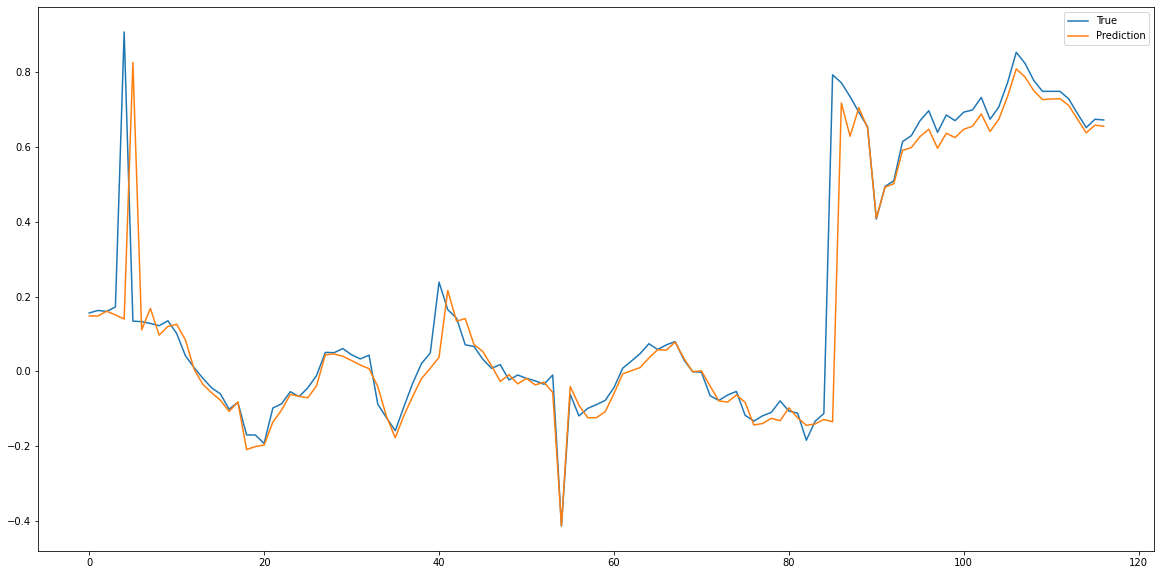

In [102]:
pred = model.predict(x_test)

fig = plt.figure(facecolor='white', figsize=(20, 10))
ax = fig.add_subplot(111)
ax.plot(y_test, label='True')
ax.plot(pred, label='Prediction')
ax.legend()
plt.show()